<a href="https://colab.research.google.com/github/fibleep/sludge-water-plant/blob/main/water_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waste Management in a Water Purification Plant
Client X has two input streams with used water that they clean using two large tanks. These tanks are filled
with living bacteria that eat the contaminants in the water, i.e. cleaning it. The bacteria will be less active
or even die if they get too much or too little food (contaminants), too much or too little oxygen, or if the
correct pH is not maintained. If this happens the sludge concentration at the exit of the tanks, i.e. our
target variable, will be to high and additional expensive cleaning steps need to be performed. It is your job
to forecast this sludge concentration 4h in advance.

## Our Variables

|Name    |Description                         |Units|
|--------|------------------------------------|-----|
|InputC1 |O2 percentage in tank 1             |%    |
|InputC2 |Liquid to reduce the pH in tank 1   |l/h  |
|InputC3 |Filtered sludge going back to tank 1|m3/h |
|InputC4 |Outside air                         |Nm3/h|
|InputC5 |Height in tank 1                    |m    |
|InputC6 |Flowrate to pH measurement in tank 1|l/h  |
|InputC7 |pH of liquid in tank 1              |pH   |
|InputC8 |Flowrate to O2 measurement in tank 1|l/h  |
|InputC9 |O2 dissolved in tank 1              |mg/l |
|InputC10|Temperature of liquid in tank 1     |°C   |
|        |                                    |     |
|InputE1 |Consentration of sludge             |g/l  |
|InputE2 |Conductivity                        |mS   |
|InputE3 |NO3 dissolved                       |mg/l |
|        |                                    |     |
|InputD1 |O2 percentage in tank 2             |%    |
|InputD2 |Liquid to reduce the pH in tank 2   |l/h  |
|InputD3 |Filtered sludge going back to tank 2|m3/h |
|InputD4 |Outside air                         |Nm3/h|
|InputD5 |Height in tank 2                    |m    |
|InputD6 |Flowrate to pH measurement in tank 1|l/h  |
|InputD7 |pH of liquid in tank 2              |pH   |
|InputD8 |Flowrate to O2 measurement in tank 2|l/h  |
|InputD9 |O2 dissolved in tank 2              |mg/l |
|InputD10|Temperature of liquid in tank 2     |°C   |
|        |                                    |     |
|InputA1 |Temperature                         |°C   |
|InputA2 |Flowrate                            |m3/h |
|InputA3 |Amount of sludge in water           |mg/l |
|InputA4 |Conductivity                        |mS/cm|
|InputA5 |                                    |kg/h |
|InputA6 |pH                                  |pH   |
|        |                                    |     |
|InputB1 |Temperature                         |°C   |
|InputB2 |Flowrate                            |m3/h |
|InputB3 |Amount of sludge in water           |mg/l |
|InputB4 |Conductivity                        |mS/cm|
|InputB5 |                                    |kg/h |
|InputB6 |pH                                  |pH   |
|        |                                    |     |
|Target  |Target variable                     |mg/L |


# EDA

## Loading in data and installing necessary packages

In [439]:
!git clone https://github.com/fibleep/sludge-water-plant.git
!pip install pandas numpy seaborn matplotlib xgboost

fatal: destination path 'sludge-water-plant' already exists and is not an empty directory.


In [440]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/sludge-water-plant/dataset/dataset.csv",index_col=[0])
df.index = pd.to_datetime(df.index)
df.head()

,InputC1,InputC2,InputC3,InputC4,InputC5,InputC6,InputC7,InputC8,InputC9,InputC10,...,InputA4,InputA5,InputA6,InputB1,InputB2,InputB3,InputB4,InputB5,InputB6,Target
2022-01-01 00:00:00,18.49650,18.81396,100.0696,618.6791,NaN,1931.360,7.272931,1878.295,1.549485,27.25480,...,60.10090,7.385031,7.081979,27.39823,20.89696,260.1674,2.193955,NaN,6.236635,NaN
2022-01-01 00:05:00,18.49731,18.70401,100.0715,613.7349,NaN,1929.365,7.273591,1878.252,1.552745,27.25177,...,60.09105,7.375766,7.136544,27.07825,26.92165,259.9575,2.187813,NaN,6.238485,NaN
2022-01-01 00:10:00,18.49693,18.59405,100.0733,608.7906,NaN,1924.322,7.274251,1878.209,1.556006,27.24874,...,60.08120,7.366502,7.085941,26.75828,14.01370,259.7475,2.181671,NaN,6.240336,NaN
2022-01-01 00:15:00,18.49603,18.48410,100.0751,603.8464,NaN,1919.279,7.274910,1878.167,1.559266,27.24572,...,60.07135,7.357237,6.743883,26.50328,5.78938,259.5375,2.175529,NaN,6.242187,NaN
2022-01-01 00:20:00,18.49512,18.37415,100.0770,598.9022,NaN,1914.235,7.275570,1878.124,1.562526,27.24269,...,60.06150,7.347972,6.621848,26.29828,39.27962,259.3275,2.169388,NaN,6.244037,NaN


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76474 entries, 2022-01-01 00:00:00 to 2022-09-23 13:45:00
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   InputC1   71948 non-null  float64
 1   InputC2   70943 non-null  float64
 2   InputC3   71116 non-null  float64
 3   InputC4   76396 non-null  float64
 4   InputC5   67461 non-null  float64
 5   InputC6   70914 non-null  float64
 6   InputC7   70852 non-null  float64
 7   InputC8   70828 non-null  float64
 8   InputC9   70880 non-null  float64
 9   InputC10  70802 non-null  float64
 10  InputE1   70871 non-null  float64
 11  InputE2   74587 non-null  float64
 12  InputE3   33120 non-null  float64
 13  InputD1   71923 non-null  float64
 14  InputD2   71190 non-null  float64
 15  InputD3   71138 non-null  float64
 16  InputD4   76398 non-null  float64
 17  InputD5   66353 non-null  float64
 18  InputD6   70881 non-null  float64
 19  InputD7   71128 non-null  float6

Looks like the data is collected every 5 minutes, NaN values are present, the target column can be NaN as well

In [442]:
missing_values = df.isnull().sum() / len(df)
missing_values.sort_values(ascending=False).head(5)

InputE3    0.566912
InputB5    0.435547
InputA2    0.332427
InputD5    0.132346
InputA4    0.125847
dtype: float64

The ratio of nulls, it looks like E3, B5, A2 are null the most often

E3 -> NO3 dissolved

B5 -> Not Specified

A2 -> Flow rate


What can we deduce from this?

Some bacteria need nitrogen, I assume that's why NO3 is sometimes null and sometimes not.

B5 is not specified


In [443]:
df['Target'].describe()

count    70286.000000
mean        51.028149
std         44.037615
min         -0.011699
25%         21.311235
50%         33.956840
75%         62.185650
max        203.460900
Name: Target, dtype: float64

This is sludge, in mg/L. The negative value is probably a mistake of the readings.

It looks like there's quite a bit of variation, there are some really high outliers but generally it should be around 30-40 mg/L

In [444]:
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr = corr.unstack().transpose().sort_values(ascending=False).dropna()
corr[:20]

InputD10  InputC10    0.997912
InputD4   InputC4     0.985786
InputD1   InputC1     0.973743
InputA5   InputA3     0.860394
          InputC4     0.802451
InputB5   InputB3     0.800484
InputA5   InputD4     0.793131
InputD7   InputC7     0.772154
Target    InputD5     0.762300
InputD5   InputC5     0.742540
InputA3   InputC4     0.711730
InputD9   InputC9     0.700897
InputA3   InputD4     0.693287
InputC4   InputC2     0.572892
InputD4   InputC2     0.571811
InputA5   InputE1     0.569396
InputA3   InputE1     0.561188
Target    InputC5     0.559241
InputD4   InputE1     0.549919
InputE1   InputC4     0.536829
dtype: float64

The most correlated and interesting features are:

- D10 - C10 - Temperatures in both tanks
- D4 - C4 - Outside air
- D1 - C1 - 02 Percentage in Tanks
- A5 - A3 - ???? / Amount of sludge in water
   - This seems like a very important correlation, shame there's no description for A5, need to keep this in mind
- A5 - D4 - ???? / Outside air
  - Another correlation with the missing feature
- Target/D5 Height of the 2nd tank
  - The 2nd tank is more correlated with the target than the first tank
- A3 / C4 & D4 - Amount of sludge / Air outside

We can remove some columns that are not needed

In [445]:
df = df.drop(["InputD10","InputD4","InputD1", "InputD2", "InputC5"],axis=1)

array([[<Axes: title={'center': 'InputC1'}>,
        <Axes: title={'center': 'InputC2'}>,
        <Axes: title={'center': 'InputC3'}>,
        <Axes: title={'center': 'InputC4'}>,
        <Axes: title={'center': 'InputC6'}>,
        <Axes: title={'center': 'InputC7'}>],
       [<Axes: title={'center': 'InputC8'}>,
        <Axes: title={'center': 'InputC9'}>,
        <Axes: title={'center': 'InputC10'}>,
        <Axes: title={'center': 'InputE1'}>,
        <Axes: title={'center': 'InputE2'}>,
        <Axes: title={'center': 'InputE3'}>],
       [<Axes: title={'center': 'InputD3'}>,
        <Axes: title={'center': 'InputD5'}>,
        <Axes: title={'center': 'InputD6'}>,
        <Axes: title={'center': 'InputD7'}>,
        <Axes: title={'center': 'InputD8'}>,
        <Axes: title={'center': 'InputD9'}>],
       [<Axes: title={'center': 'InputA1'}>,
        <Axes: title={'center': 'InputA2'}>,
        <Axes: title={'center': 'InputA3'}>,
        <Axes: title={'center': 'InputA4'}>,
      

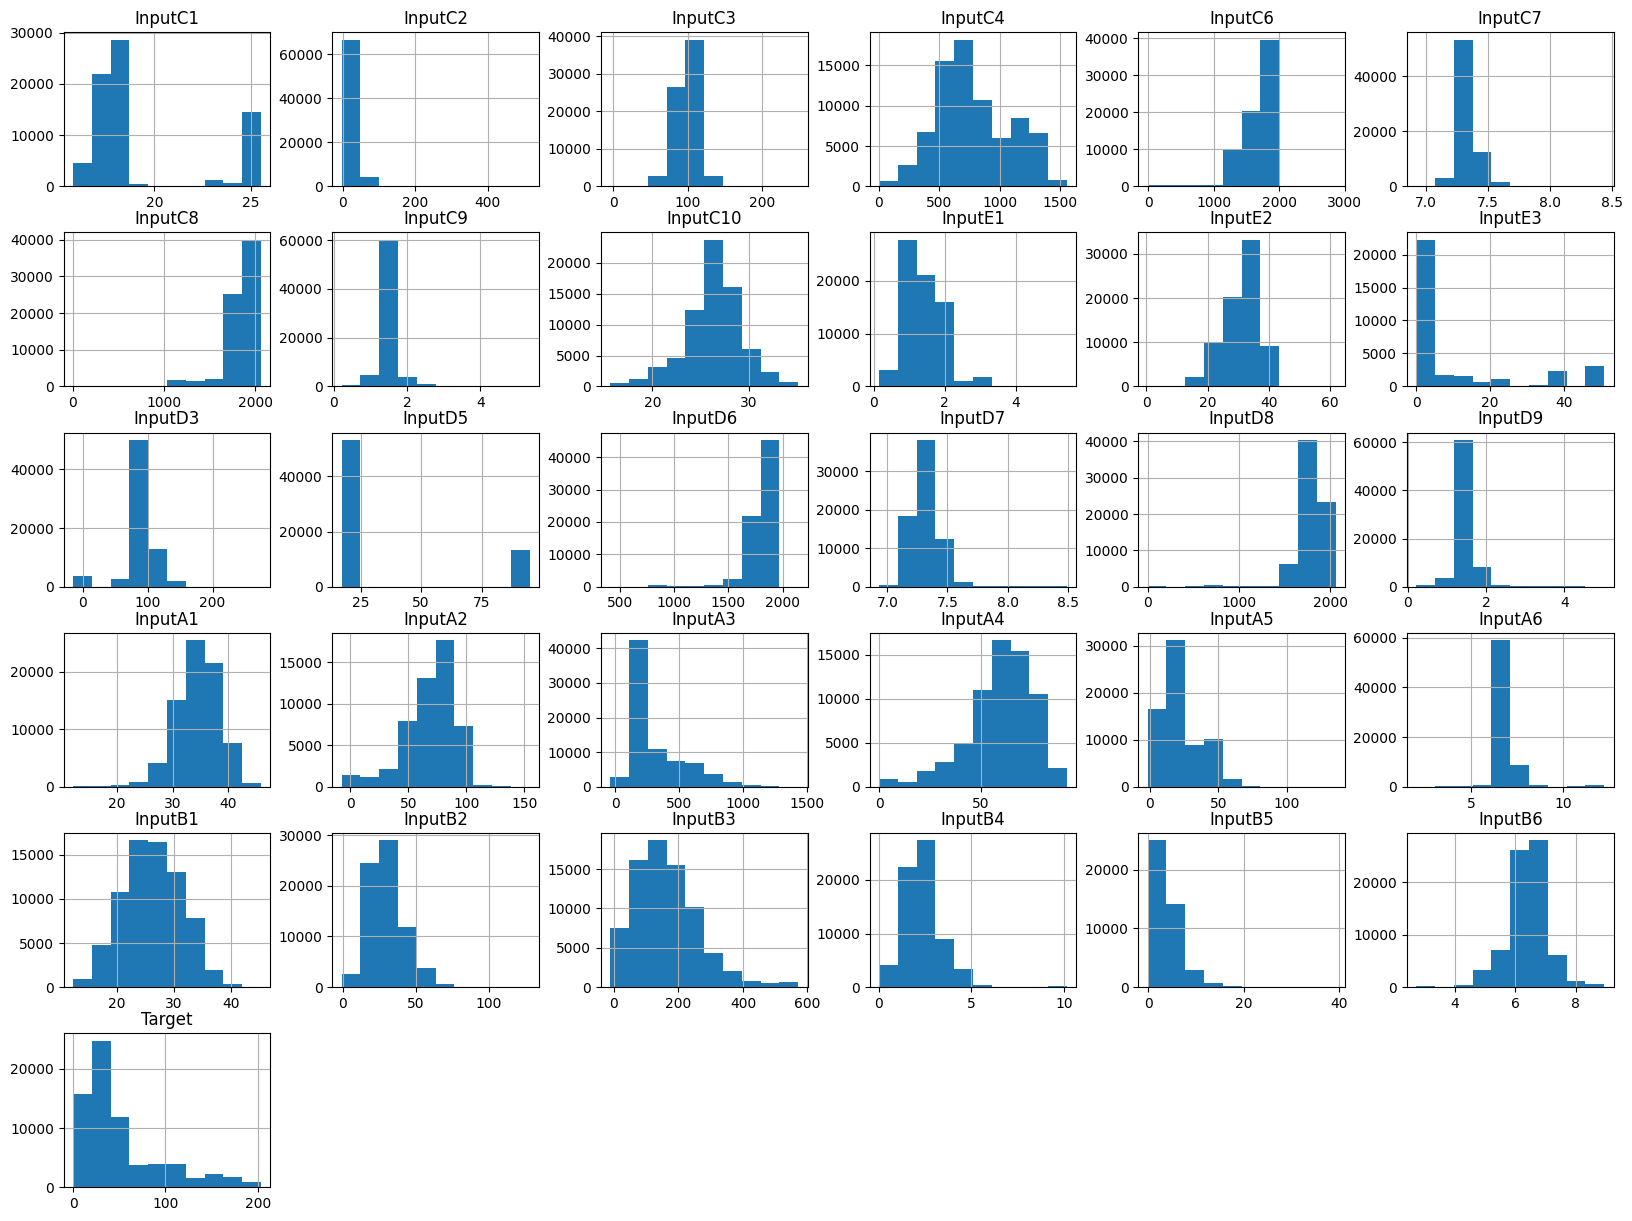

In [446]:
df.hist(figsize=(20,15))

## Exploration of Outliers

## Data Augmentation

The value that's null the most often is E3 - NO3 dissolved, let's assume that is because it is 0 or close to 0. Looking at the histogram, E3 is mostly 0.

In [447]:
import pandas as pd
from sklearn.impute import SimpleImputer



def create_date_features(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    return df
df = create_date_features(df)

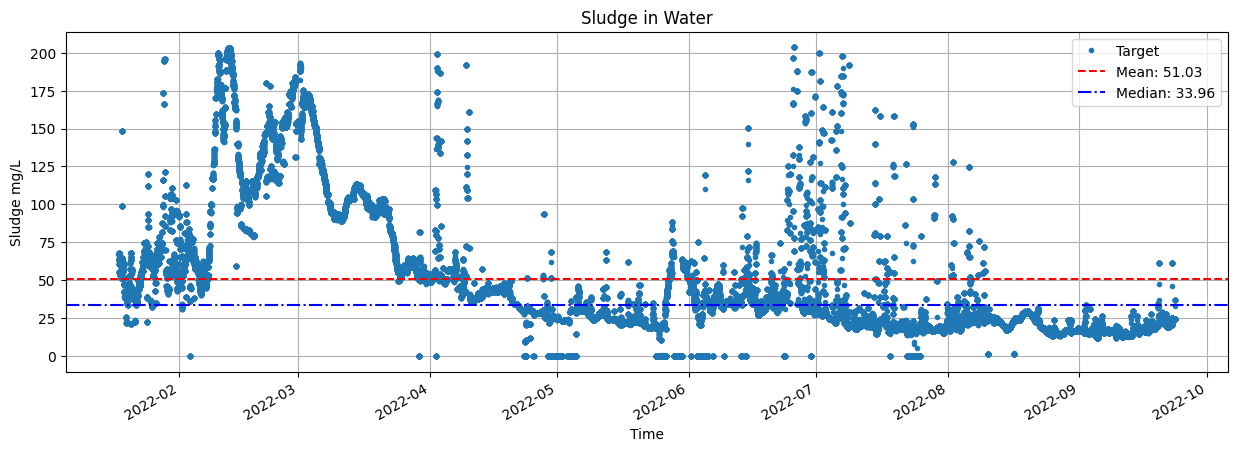

In [448]:
def plot_target(df):
  df['Target'].plot(
      style='.',
      figsize=(15, 5),
      title='Sludge in Water',
      grid=True,
      xlabel="Time",
      ylabel="Sludge mg/L"
      )

  mean_value = df['Target'].mean()
  median_value = df['Target'].median()

  plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axhline(median_value, color='blue', linestyle='-.', label=f'Median: {median_value:.2f}')

  plt.legend()
  plt.show()

plot_target(df)

It looks like the data was pretty unstable throughout the year with huge spikes in February, March, April and July.

### Investigating the seasonal anomalies

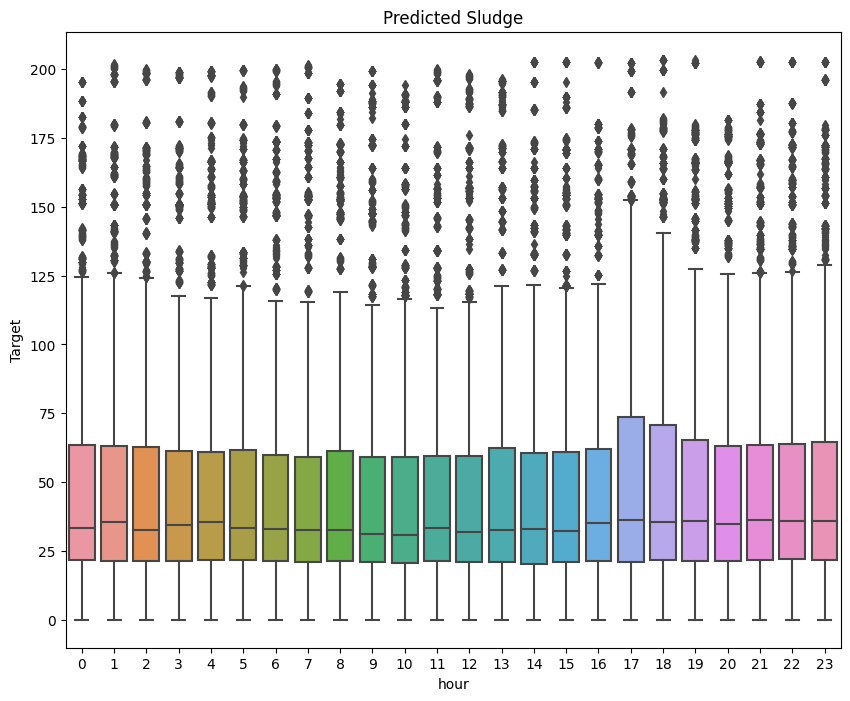

In [449]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="hour", y="Target")
ax.set_title("Predicted Sludge")
plt.show()

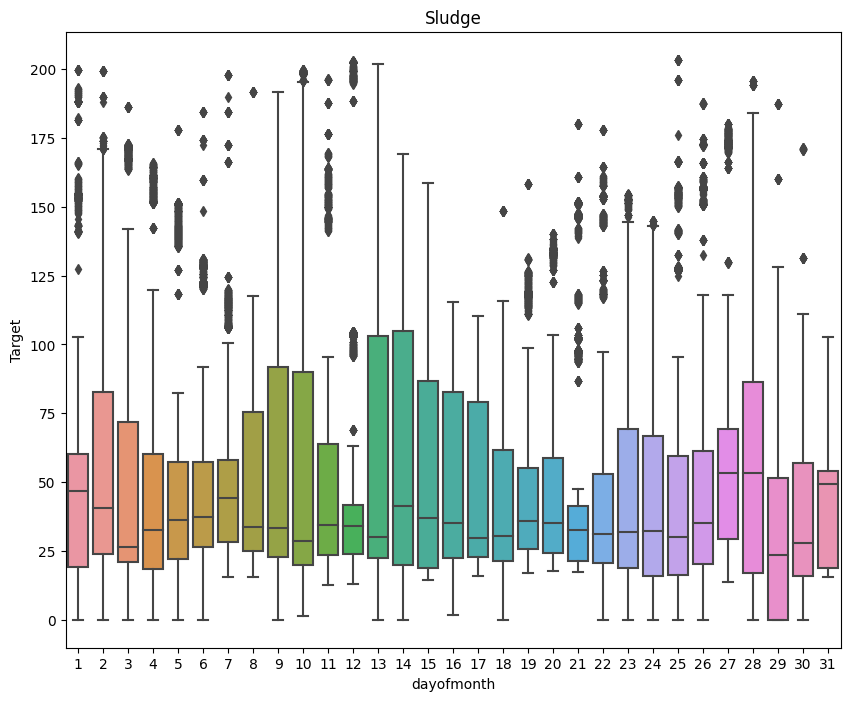

In [450]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="dayofmonth", y="Target")
ax.set_title("Sludge")
plt.show()

Null Ratio: 0.007715413157429766


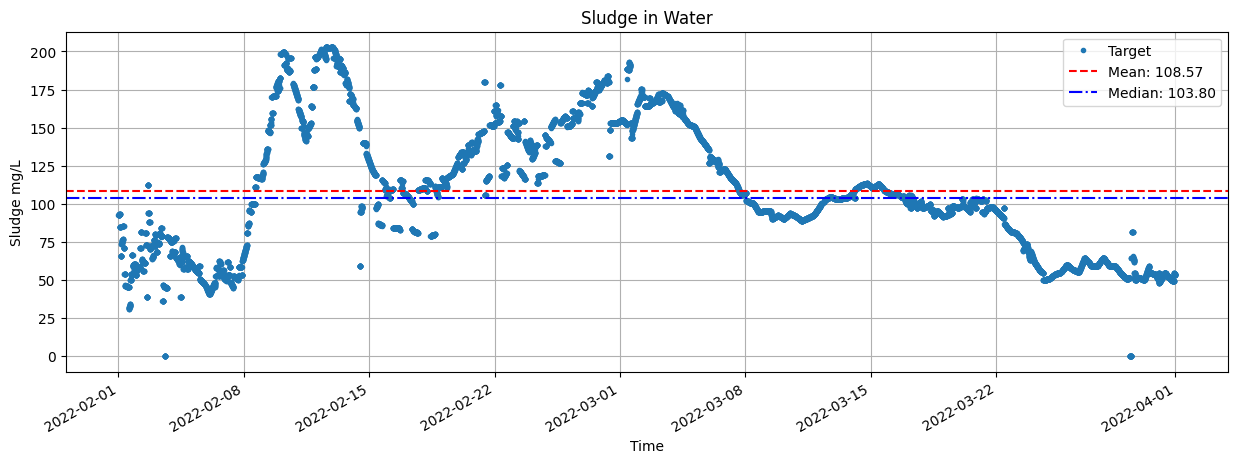

In [451]:
spring_anomalies = df.loc[(df.index > "02-01-2022") & (df.index < "04-01-2022")]
print(f"Null Ratio: {spring_anomalies['Target'].isnull().sum() / len(spring_anomalies)}")
plot_target(spring_anomalies)

Null Ratio: 0.0588104913188031


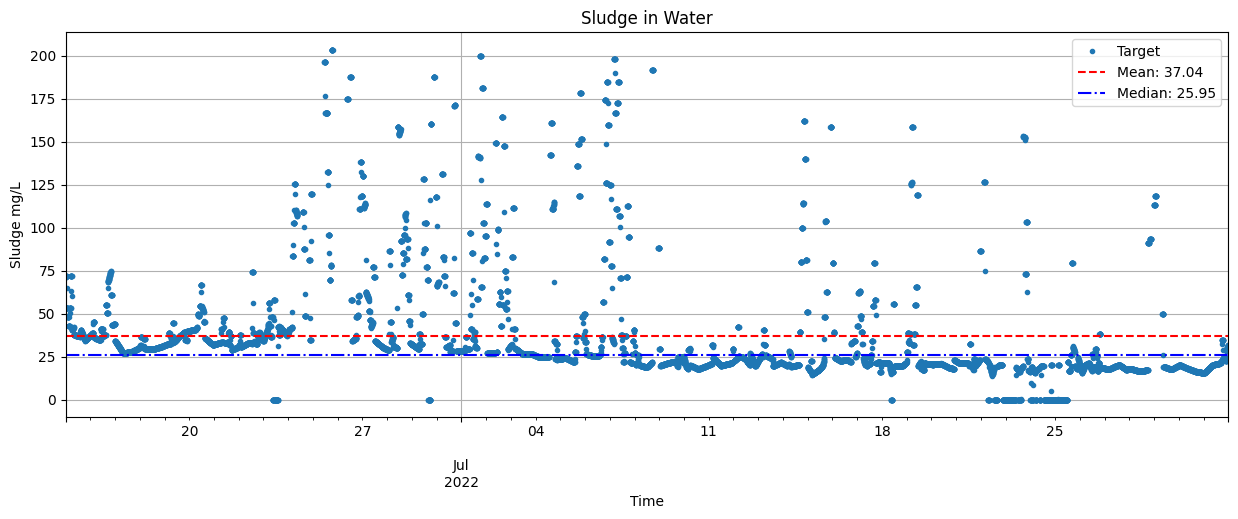

In [452]:
summer_anomalies = df.loc[(df.index > "06-15-2022") & (df.index < "08-01-2022")]
print(f"Null Ratio: {summer_anomalies['Target'].isnull().sum() / len(summer_anomalies)}")
plot_target(summer_anomalies)

For the summer anomalies, I would like to see only the outlier points

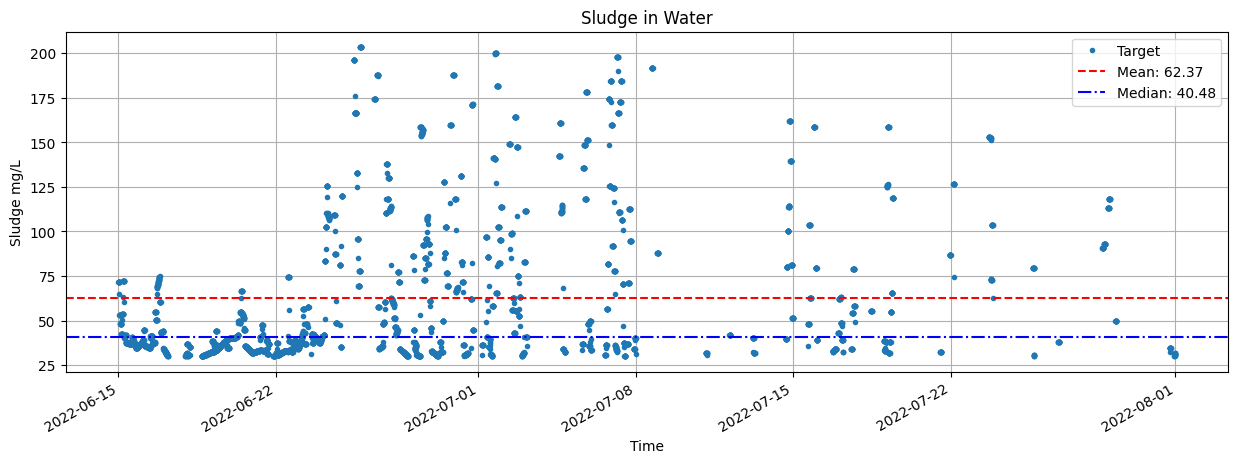

In [453]:
summer_anomalies = summer_anomalies[summer_anomalies['Target']> 30]
plot_target(summer_anomalies)

### Feature Engineering

In [454]:
def create_features(df):
    """
    Create features for the df
    """
    df = df.copy()
    df['Target'] = df['Target'].shift(-48) # Shift by 4 hours to the future
    df.dropna(inplace=True)

    lag_periods = [6, 12, 24, 48, 96]  # Define the lag periods
    for period in lag_periods:
        df[f'y_lag_{period}'] = df['Target'].shift(-period) # to the past

    rolling_windows = [6, 12, 24,48, 96, 128]  # Define the rolling window sizes, already does it with past values
    for window in rolling_windows:
        df[f'rolling_mean_{window}'] = df['Target'].rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df['Target'].rolling(window=window).std()

    df.dropna(inplace=True)
    return df
df = create_features(df)

### Split into Train Val Test

In [455]:
# Calculate the indices for splitting
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
test_size = len(df) - train_size - val_size

# Split the data
X_train = df.iloc[:train_size].drop('Target', axis=1)
y_train = df.iloc[:train_size]['Target']

X_val = df.iloc[train_size:train_size+val_size].drop('Target', axis=1)
y_val = df.iloc[train_size:train_size+val_size]['Target']

X_test = df.iloc[-test_size:].drop('Target', axis=1)
y_test = df.iloc[-test_size:]['Target']


In [456]:
data_preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

data_preprocessing_pipeline.fit(X_train)
X_train_transformed = data_preprocessing_pipeline.transform(X_train)
X_val_transformed = data_preprocessing_pipeline.transform(X_val)
X_test_transformed = data_preprocessing_pipeline.transform(X_test)

X_train = pd.DataFrame(X_train_transformed, columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(X_val_transformed, columns=X_val.columns, index=X_val.index)
X_test = pd.DataFrame(X_test_transformed, columns=X_test.columns, index=X_test.index)

# Train our model(s)

In [457]:
def plot_true_vs_predicted(X_test, y_true_val, mod_val_pred):
    """
    Plots the comparison between true values and predictions.
    """
    predict_df = pd.DataFrame({'True Values': y_true_val, 'Predictions': mod_val_pred})
    predict_df.index = X_test.index
    plot_df = predict_df.reset_index()[-10000:]

    plt.figure(figsize=(15, 5))
    plt.plot(plot_df['True Values'], label='Truth Data')
    plt.plot(plot_df['Predictions'], label='Predictions', linestyle='--')
    plt.legend()
    plt.title('Comparison of True Values and Predictions')
    plt.show()

def plot_validation_errors(y_true_val, mod_val_pred, train_size):
    """
    Plots validation errors and relative validation errors.
    """
    val_res = y_true_val - mod_val_pred
    rel_val_res = val_res / y_true_val
    val_size = y_true_val.shape[0]

    fig, ax = plt.subplots(2, 2, figsize=(17, 7), gridspec_kw={'width_ratios': [2, 1]})

    ax[0, 0].plot(range(train_size, train_size + val_size), val_res, color='C1', label='Validation Error')
    ax[0, 0].legend()
    ax[0, 0].set_title('Validation error')

    ax[1, 0].plot(range(train_size, train_size + val_size), rel_val_res, color='C1', label='Relative Validation Error')
    ax[1, 0].legend()
    ax[1, 0].set_title('Relative Validation error')

    ax[1, 1].axvline(val_res.mean(), linestyle='--', color='C1', label='Average')
    ax[1, 1].hist(val_res, bins=100, color='C0', label='Validation Errors')
    ax[1, 1].legend()
    ax[1, 1].set_title(f'Validation: {val_res.mean():.2f} mean | {val_res.std():.2f} std')

    fig.tight_layout()
    plt.show()

def create_plots(X_test, y_true_val, mod_val_pred):
    """
    Function to create and display various plots.
    """
    try:
      plot_true_vs_predicted(X_test, y_true_val, mod_val_pred)
    except Exception as e:
      print(f"Exception encountered! {e}")
    try:
      plot_validation_errors(y_true_val, mod_val_pred, train_size)
    except Exception as e:
      print(f"Exception encountered! {e}")


In [458]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, is_3d=False):
    """
    Evaluate the model
    """
    if is_3d:
        X_test = np.array(X_test, dtype=np.float32).reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R2 Score:", r2)

    create_plots(X_test, y_test, y_pred)


## Baseline

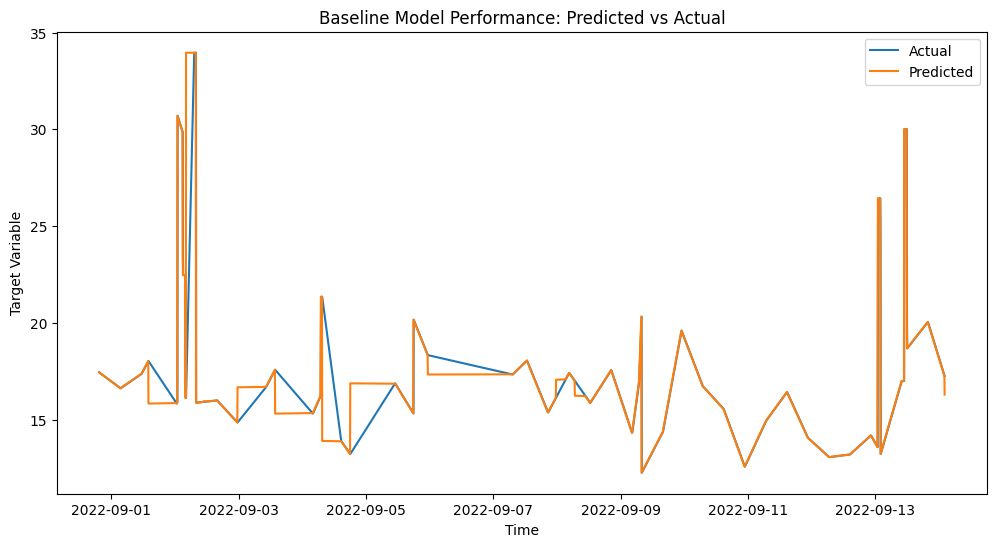

In [459]:
y_val_pred = y_val.shift(-1).fillna(y_val.mean())
plt.figure(figsize=(12, 6))
plt.plot(y_val, label='Actual')
plt.plot(y_val_pred, label='Predicted')
plt.title('Baseline Model Performance: Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

## XGBoost - Winner!

In [460]:
import xgboost as xgb

reg = xgb.XGBRegressor(
    base_score=0.5,
    booster="gbtree",
    n_estimators=10000,
    objective="reg:linear",
    eta=0.2783517929633549,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.7213504714543502,
    colsample_bytree=0.539330719937688,
    gamma=8.989898214742308,
    min_child_weight=4.064516309694911,
    reg_lambda=8.206222877659185,
    reg_alpha=4.183605973578605
)

reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    early_stopping_rounds=5000,
    verbose=100
)


[0]	validation_0-rmse:25.17353	validation_1-rmse:15.20556


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:37:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:2.68827	validation_1-rmse:1.36701
[200]	validation_0-rmse:1.92999	validation_1-rmse:1.54871
[300]	validation_0-rmse:1.55994	validation_1-rmse:1.55494
[400]	validation_0-rmse:1.31265	validation_1-rmse:1.42618
[500]	validation_0-rmse:1.15117	validation_1-rmse:1.37088
[600]	validation_0-rmse:1.03606	validation_1-rmse:1.34837
[700]	validation_0-rmse:0.96955	validation_1-rmse:1.31068
[800]	validation_0-rmse:0.92344	validation_1-rmse:1.28727
[900]	validation_0-rmse:0.88890	validation_1-rmse:1.22801
[1000]	validation_0-rmse:0.86142	validation_1-rmse:1.21172
[1100]	validation_0-rmse:0.84567	validation_1-rmse:1.20635
[1200]	validation_0-rmse:0.82778	validation_1-rmse:1.20124
[1300]	validation_0-rmse:0.81179	validation_1-rmse:1.19003
[1400]	validation_0-rmse:0.79397	validation_1-rmse:1.17309
[1500]	validation_0-rmse:0.78080	validation_1-rmse:1.16172
[1600]	validation_0-rmse:0.77184	validation_1-rmse:1.14969
[1700]	validation_0-rmse:0.76380	validation_1-rmse:1.13370
[1800]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.539330719937688, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eta=0.2783517929633549, eval_metric=None, feature_types=None,
             gamma=8.989898214742308, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=4.064516309694911, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

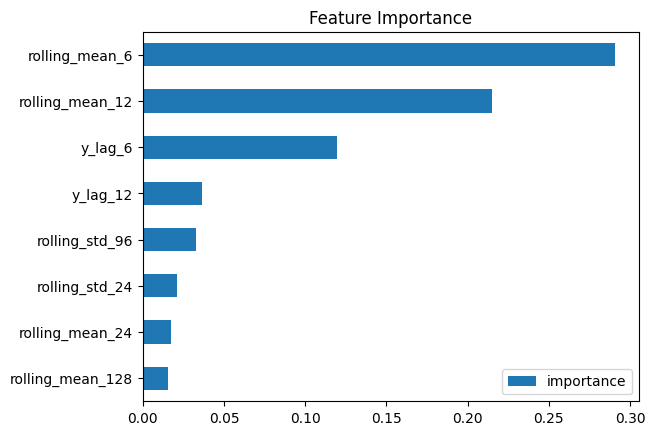

In [461]:
fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["importance"]
)
fi.sort_values("importance")[-8:].plot(kind="barh", title="Feature Importance")
plt.show()

Predictions for last 1000 entries



VAL SET:
Mean Absolute Error (MAE): 0.6177466210288868
Mean Squared Error (MSE): 1.1154999797993106
Root Mean Squared Error (RMSE): 1.0561723248595896
R2 Score: 0.8588361574109002


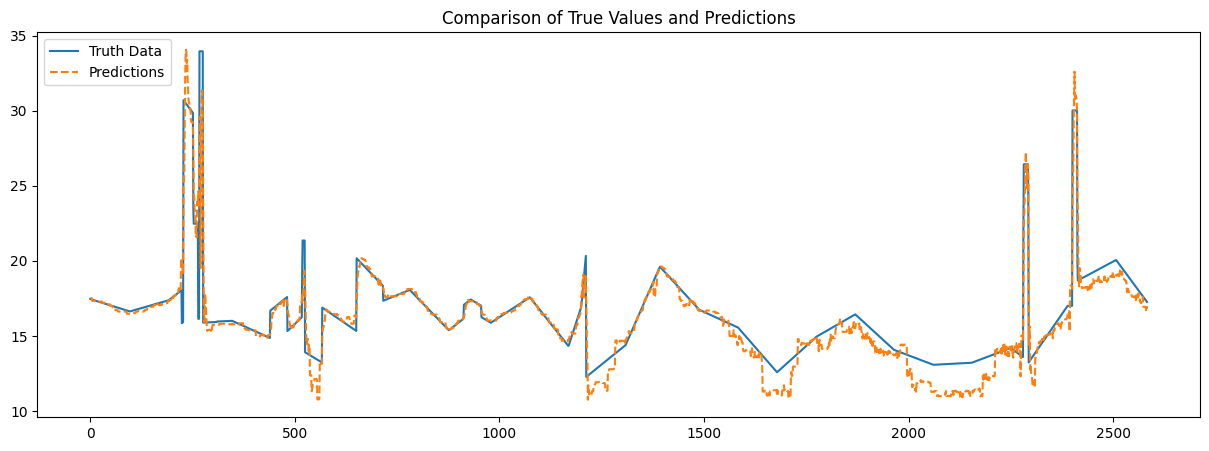

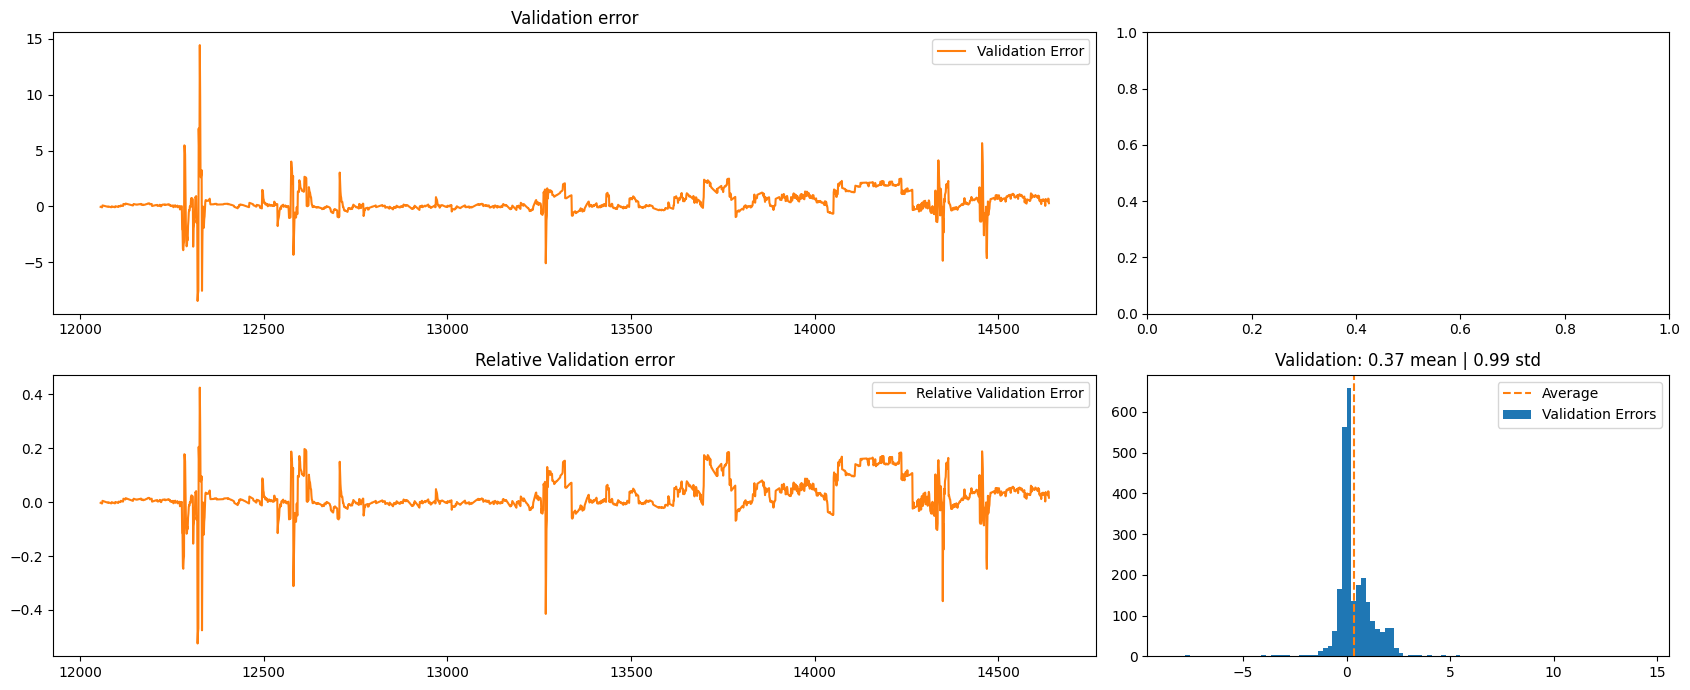



TEST SET:
Mean Absolute Error (MAE): 0.9006261125054373
Mean Squared Error (MSE): 1.937303231763265
Root Mean Squared Error (RMSE): 1.3918704076756805
R2 Score: 0.9247597699709578


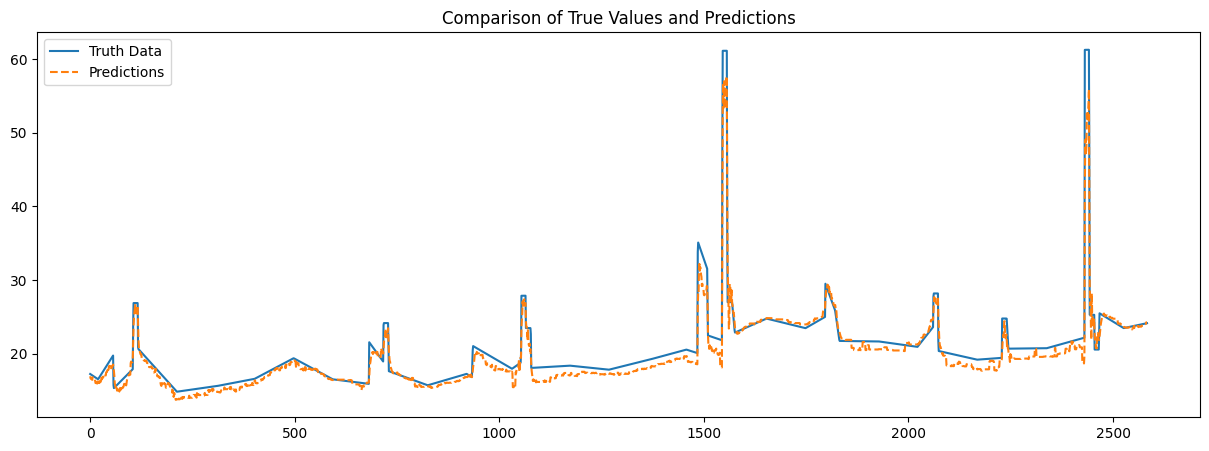

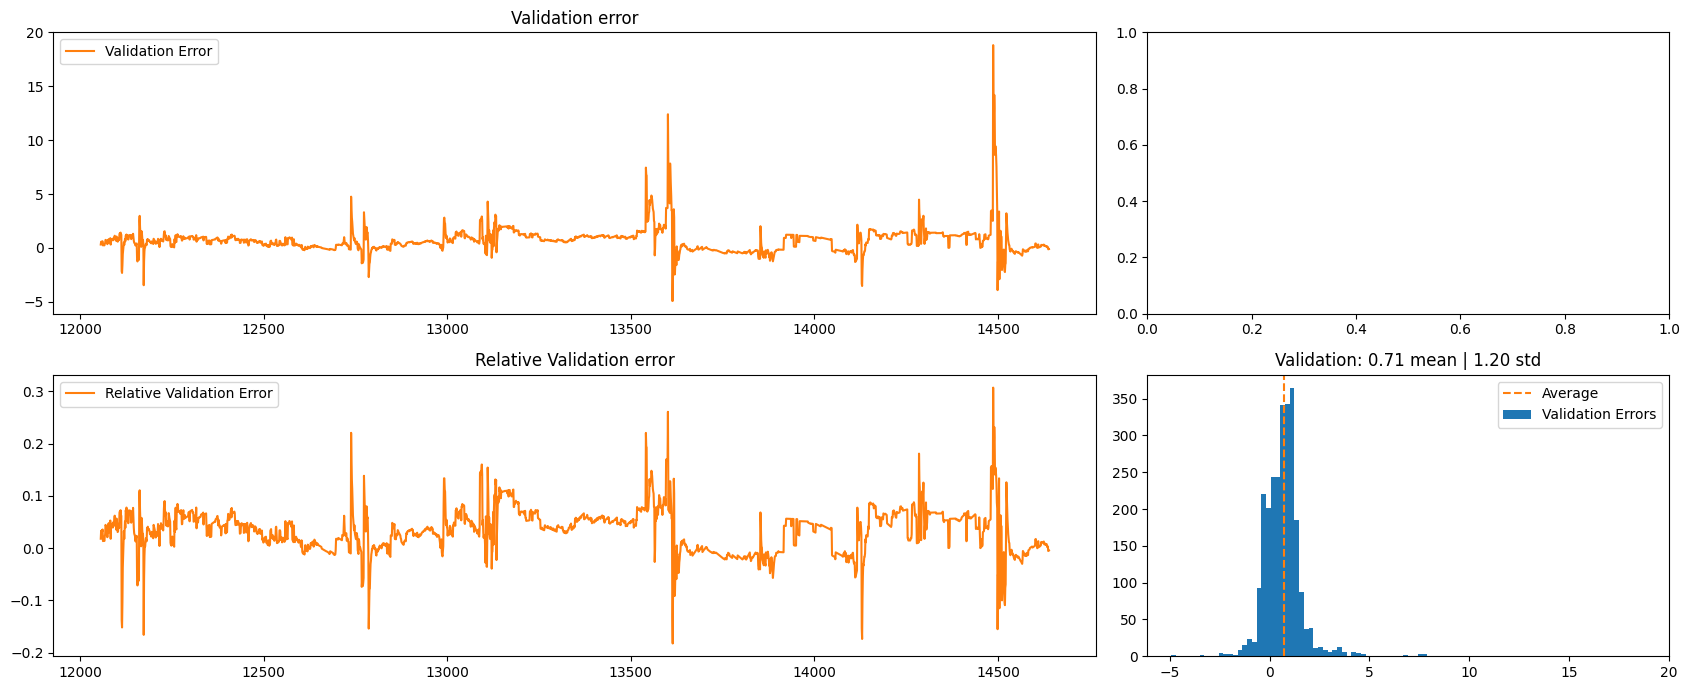

In [462]:
print("\n\nVAL SET:")
evaluate_model(reg, X_val, y_val)


print("\n\nTEST SET:")
evaluate_model(reg, X_test, y_test)

XGB looks very promising, let's try improving it. To do that we will use `Optuna`, a framework for finding the best hyperparameters

In [463]:
!pip install optuna

In [464]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error


def objective(trial):
    """
    Using Optuna to find the best hyperparameters
    """
    # Define the search space for hyperparameters
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'num_boost_round': 100000,
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 10.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10.0),
        'lambda': trial.suggest_float('lambda', 0.1, 10.0),
        'alpha': trial.suggest_float('alpha', 0.0, 10.0),
    }

    train_size = int(len(df) * 0.8)
    X_train = df.iloc[:train_size].drop('Target', axis=1)
    y_train = df.iloc[:train_size]['Target']

    X_val = df.iloc[train_size:].drop('Target', axis=1)
    y_val = df.iloc[train_size:]['Target']

    # Convert the data into DMatrix format
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    # Early stopping
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'validation-rmse')

    # Train the model with early stopping
    evals_result = {}
    model = xgb.train(param, dtrain, evals=[(dval, 'validation')],
                      early_stopping_rounds=100, callbacks=[pruning_callback],
                      evals_result=evals_result, verbose_eval=False)

    # Calculate the root mean squared error
    y_pred = model.predict(dval)
    rmse = mean_squared_error(y_val, y_pred, squared=False)

    return rmse

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100) # Control the number of trials

# Print the best hyperparameters and the best RMSE
best_params = study.best_params
best_rmse = study.best_value
print("Best Hyperparameters: ", best_params)
print("Best RMSE: ", best_rmse)


[I 2024-01-04 16:39:04,495] A new study created in memory with name: no-name-426b17f5-2fe7-42bf-8a2d-40f3ed487ddb
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:39:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-01-04 16:39:05,502] Trial 0 finished with value: 1.3779934134720688 and parameters: {'eta': 0.18976446243350575, 'max_depth': 10, 'subsample': 0.9891909020939066, 'colsample_bytree': 0.70616658310431, 'gamma': 0.3937920658815386, 'min_child_weight': 9.380729390345783, 'lambda': 0.7094806505905772, 'alpha': 0.10151163764748117}. Best is trial 0 with value: 1.3779934134720688.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:39:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-01-04 16:39:06,779] Trial 1 finished with value: 2.068834027859078 and p

Best Hyperparameters:  {'eta': 0.2706868377157423, 'max_depth': 9, 'subsample': 0.9041497131729184, 'colsample_bytree': 0.9629206392512653, 'gamma': 3.8326756086344833, 'min_child_weight': 4.204299894831579, 'lambda': 2.297334563010618, 'alpha': 2.1646368757703693}
Best RMSE:  0.7442939776736006


Best Hyperparameters:  {'eta': 0.2783517929633549, 'max_depth': 3, 'subsample': 0.7213504714543502, 'colsample_bytree': 0.539330719937688, 'gamma': 8.989898214742308, 'min_child_weight': 4.064516309694911, 'lambda': 8.206222877659185, 'alpha': 4.183605973578605}
Best RMSE:  5.223308646604528

## LSTM

An LSTM is good for time series data, the forget mechanism makes sure that only the relevant data is used.

In [465]:
!pip install keras

In [466]:
import numpy as np
import keras
from keras.layers import LSTM, Dense
import tensorflow as tf

transformed_X_train = np.array(X_train, dtype=np.float32).reshape((X_train.shape[0], 1, X_train.shape[1]))
transformed_X_val = np.array(X_val, dtype=np.float32).reshape((X_val.shape[0], 1, X_val.shape[1]))

n_timesteps, n_features, n_outputs = transformed_X_train.shape[1], transformed_X_train.shape[2], 1

def build_lstm(transformed_X_train, y_train, transformed_X_val, y_val, epochs=25, batch_size=32):
    """
    Build an LSTM model
    """

    # Store the best model
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    # Build the network
    model = keras.Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_outputs))
    print('compiling baseline model...')
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
    print('fitting model...')
    history = model.fit(transformed_X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(transformed_X_val, y_val), verbose=1, callbacks=callbacks)
    return model, history

model, history = build_lstm(transformed_X_train, y_train, transformed_X_val, y_val)


compiling baseline model...
fitting model...
Epoch 1/25
377/377 [==============================] - 4s 6ms/step - loss: 124.7510 - mae: 6.4401 - mape: 10989823.0000 - val_loss: 184.3324 - val_mae: 11.3033 - val_mape: 72.0146
Epoch 2/25
377/377 [==============================] - 2s 5ms/step - loss: 12.4690 - mae: 1.9315 - mape: 8449424.0000 - val_loss: 200.4507 - val_mae: 11.9986 - val_mape: 76.5752
Epoch 3/25
377/377 [==============================] - 2s 6ms/step - loss: 7.8237 - mae: 1.4186 - mape: 7242236.5000 - val_loss: 164.6381 - val_mae: 10.8489 - val_mape: 69.2803
Epoch 4/25
377/377 [==============================] - 3s 7ms/step - loss: 6.0437 - mae: 1.2267 - mape: 5176412.0000 - val_loss: 170.7284 - val_mae: 11.2081 - val_mape: 71.6373
Epoch 5/25
377/377 [==============================] - 2s 5ms/step - loss: 4.4840 - mae: 1.0466 - mape: 3396322.2500 - val_loss: 158.2185 - val_mae: 10.6021 - val_mape: 67.7974
Epoch 6/25
377/377 [==============================] - 2s 5ms/step - los

In [467]:
evaluate_model(model, X_test, y_test, is_3d=True)

81/81 [==============================] - 1s 3ms/step
Mean Absolute Error (MAE): 20.59545726632629
Mean Squared Error (MSE): 499.60842371706326
Root Mean Squared Error (RMSE): 22.351922148152344
R2 Score: -18.403597799558398
Exception encountered! Per-column arrays must each be 1-dimensional
Exception encountered! Data must be 1-dimensional


## Transformer
Transformers work with attention, they can compute in parallel and are very good for large datasets

In [468]:
from keras import layers


def transformer_encoder(inputs, head_size, num_heads, ff_dim,
                        dropout=0, attention_axes=None):
  """
  Creates a single transformer block.
  """
  x = layers.LayerNormalization(epsilon=1e-6)(inputs)
  x = layers.MultiHeadAttention(
      key_dim=head_size, num_heads=num_heads, dropout=dropout,
      attention_axes=attention_axes
      )(x, x)
  x = layers.Dropout(dropout)(x)
  res = x + inputs

    # Feed Forward Part
  x = layers.LayerNormalization(epsilon=1e-6)(res)
  x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
  x = layers.Dropout(dropout)(x)
  x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
  return x + res

def build_transfromer(head_size,
                      num_heads,
                      ff_dim,
                      num_trans_blocks,
                      mlp_units, dropout=0, mlp_dropout=0, attention_axes=None) -> tf.keras.Model:
  """
  Creates final model by building many transformer blocks.
  """
  inputs = tf.keras.Input(shape=(n_timesteps, n_features))
  x = inputs
  for _ in range(num_trans_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = layers.Dense(dim, activation="relu")(x)
    x = layers.Dropout(mlp_dropout)(x)

  outputs = layers.Dense(n_outputs, activation='relu')(x)
  return tf.keras.Model(inputs, outputs)
transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2,
                                num_trans_blocks=4, mlp_units=[256],
                                mlp_dropout=0.10, dropout=0.10,
                                attention_axes=1)

transformer.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae", 'mape'],
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10,
                                              restore_best_weights=True)]

t_hist = transformer.fit(transformed_X_train, y_train, batch_size=32,
                         epochs=25, validation_data=(transformed_X_val, y_val),
                         verbose=1, callbacks=callbacks)

Epoch 1/25
377/377 [==============================] - 32s 39ms/step - loss: 719.4283 - mae: 22.7592 - mape: 99.9005 - val_loss: 273.9999 - val_mae: 16.3125 - val_mape: 100.0000
Epoch 2/25
377/377 [==============================] - 7s 20ms/step - loss: 719.4282 - mae: 22.7592 - mape: 99.9005 - val_loss: 273.9999 - val_mae: 16.3125 - val_mape: 100.0000
Epoch 3/25
377/377 [==============================] - 7s 19ms/step - loss: 719.4288 - mae: 22.7592 - mape: 99.9005 - val_loss: 273.9999 - val_mae: 16.3125 - val_mape: 100.0000
Epoch 4/25
377/377 [==============================] - 7s 19ms/step - loss: 719.4284 - mae: 22.7592 - mape: 99.9005 - val_loss: 273.9999 - val_mae: 16.3125 - val_mape: 100.0000
Epoch 5/25
377/377 [==============================] - 8s 20ms/step - loss: 719.4284 - mae: 22.7592 - mape: 99.9005 - val_loss: 273.9999 - val_mae: 16.3125 - val_mape: 100.0000
Epoch 6/25
377/377 [==============================] - 7s 18ms/step - loss: 719.4285 - mae: 22.7592 - mape: 99.9005 - va

In [469]:
evaluate_model(transformer,X_test,y_test,True)

81/81 [==============================] - 1s 4ms/step
Mean Absolute Error (MAE): 20.29221496517028
Mean Squared Error (MSE): 437.5222246217224
Root Mean Squared Error (RMSE): 20.91703192667933
R2 Score: -15.992318127397507
Exception encountered! Per-column arrays must each be 1-dimensional
Exception encountered! Data must be 1-dimensional


It looks like the XGBoost remains victorious

Mean Absolute Error (MAE): 0.9006261125054373
Mean Squared Error (MSE): 1.937303231763265
Root Mean Squared Error (RMSE): 1.3918704076756805
R2 Score: 0.9247597699709578


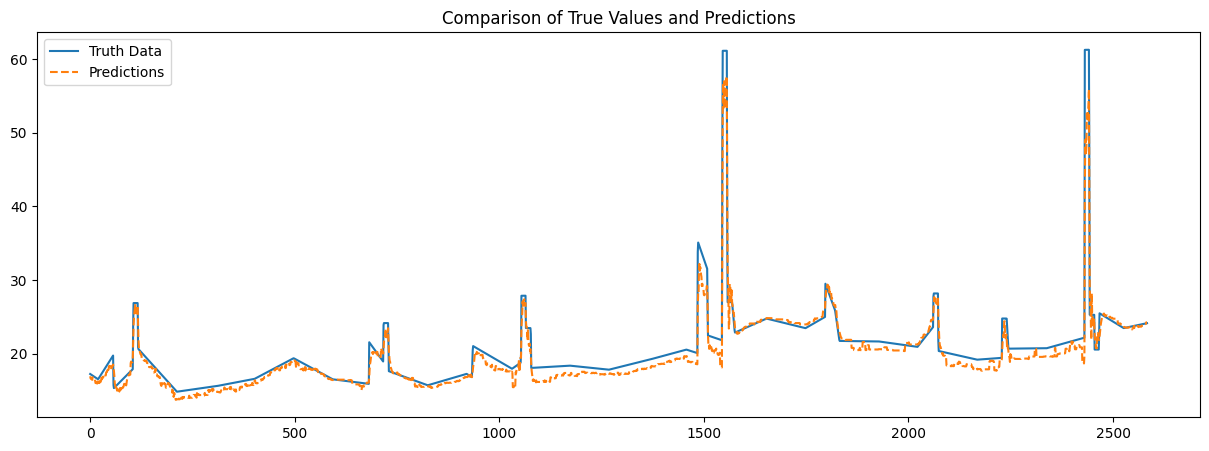

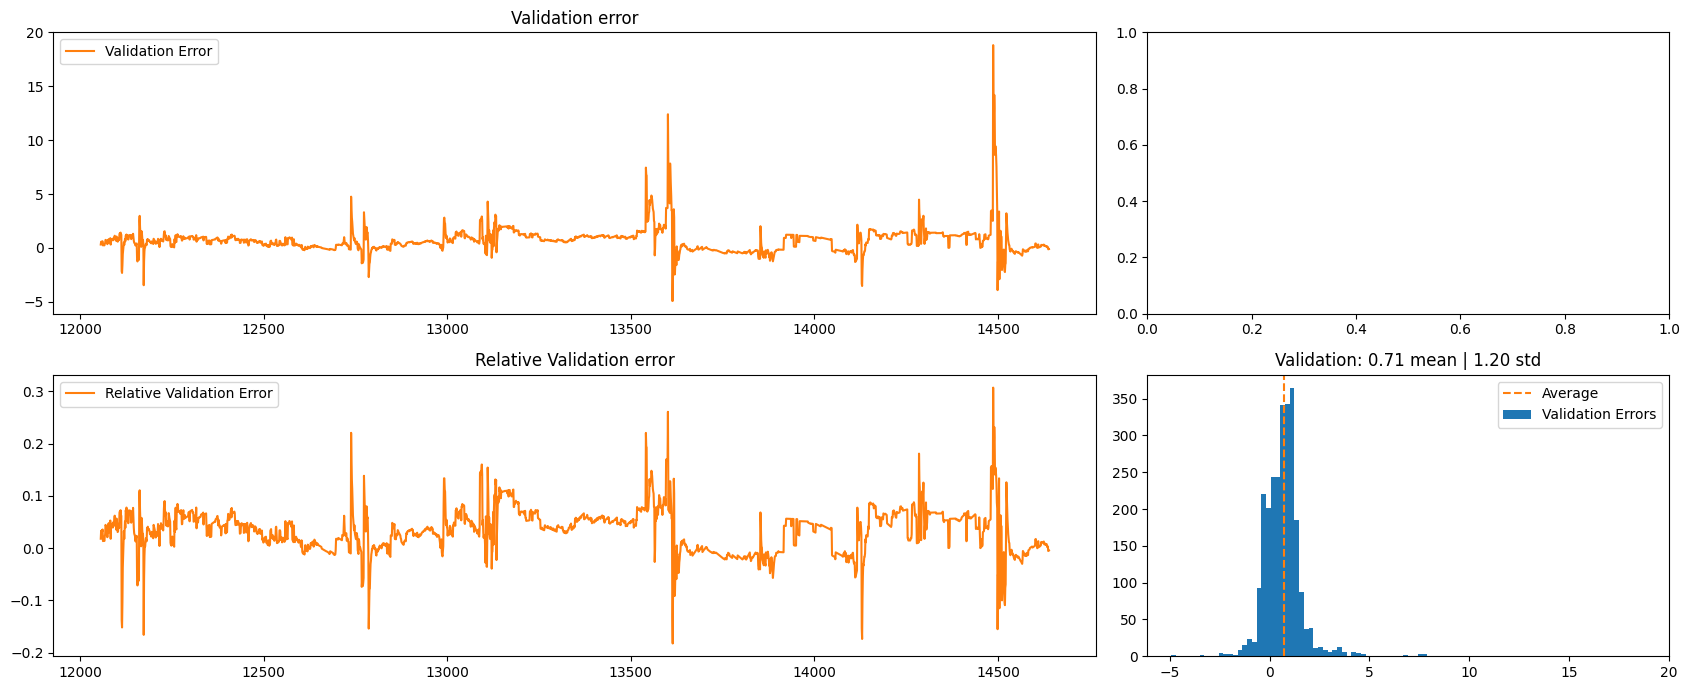

In [470]:
evaluate_model(reg,X_test,y_test)

# Conclusion

The models we created turned out to be pretty decent, that is only because we used a rolling mean of the past which means that a baseline model would have a very similar accuracy.

By giving the model vision of the past, it became excellent at predicting the future. By method of trial and error, I was not able to find an optimal solution by using the features provided